## Dependencies

In [2]:
#import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
%matplotlib inline

from math import sqrt
SPINE_COLOR = 'gray'

## Latex Style (Optional)

In [3]:

# Style parameters
pd.set_option('display.mpl_style', 'default') 
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 50)
pd.options.display.mpl_style = 'default'
new_style = {'grid': True}
mpl.rc('axes', **new_style)

# cool colors
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 10}

#mpl.rc('font', **font)

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 
fig = plt.figure()

#You must select the correct size of the plot in advance
#fig.set_size_inches(3.54,3.54) 

def legendaryFormat(leg, resize=True):
    # The frame is matplotlib.patches.Rectangle instance surrounding the legend.
    frame = legend.get_frame()
    frame.set_facecolor('white')
    frame.set_edgecolor('white')

    # Set the fontsize
    if(resize):
        for label in legend.get_texts():
            label.set_fontsize('large')
        for label in legend.get_lines():
            label.set_linewidth(2)  # the legend line width
        
        
def latexify(fig_width=None, fig_height=None, columns=1):
    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """

    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])

    if fig_width is None:
        fig_width = 3.39 if columns==1 else 6.9 # width in inches

    if fig_height is None:
        golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
        fig_height = fig_width*golden_mean # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'ps',
              'text.latex.preamble': ['\usepackage{gensymb}'],
              'axes.labelsize': 8, # fontsize for x and y labels (was 10)
              'axes.titlesize': 10,
              'text.fontsize': 9, # was 10
              'legend.fontsize': 8, # was 10
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'font.family' : 'helvetica',
              'text.usetex': True,
              'figure.figsize': [fig_width,fig_height],
              'font.family': 'serif'
    }

    mpl.rcParams.update(params)


def format_axes(ax):

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(SPINE_COLOR)
        ax.spines[spine].set_linewidth(0.5)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_tick_params(direction='out', color=SPINE_COLOR)

    return ax



In [28]:
%matplotlib inline

In [29]:
#run for latex-optimised generation
latexify()

## Data Preparation & Cleaning

In [67]:

class ExpLoader():
    
    @staticmethod
    def enrich(str, df):
        dirs = str.split('/');
        df['experiment'] = dirs[2];
        df['system'] = dirs[1];
        return df
    
    @staticmethod
    def loadDataFrame(rootDir="experiments"):
        dataDirs = filter(lambda y: [s for s in y[2] if ".csv" in s],([x for x in os.walk(rootDir)]))
        DF = reduce(lambda r1,r2: pd.concat([r1,r2]), 
                map(lambda d: ExpLoader.enrich(d[0],  
                reduce(lambda f1,f2: pd.concat([f1,f2]),
                map(lambda x: pd.read_csv(d[0] +'/'+ x, delimiter=',', index_col=[1]),
                    filter(lambda y: ".csv" in y ,d[2])))), dataDirs))
        DF['local time'] = DF['local_End'] - DF['window_Start']
        DF['notif time'] = DF['window_End'] - DF['local_End']
        DF['full time'] = DF['window_End'] - DF['window_Start']
        DF['parallelism'] = DF.index
        DF['step'] = DF['step'] - 1
        return DF[(DF['step'] > 0) & (DF['step'] < 999999999)]
    


In [68]:
DF = ExpLoader.loadDataFrame()    
#compare dataset sizes
print 'Time-Killer: #loops:'+str(DF[(DF[DF.system.name] == 'watermarks')].size)
print 'Timely: #loops:'+str(DF[(DF[DF.system.name] == 'timely')].size)

DF

Time-Killer: #loops:138880
Timely: #loops:139200


,buffer_Interval,ctxid,experiment,instanceID,local_End,num_Windows,operatorID,step,system,win_Size,window_End,window_Start,local time,notif time,full time,parallelism
parallelism,,,,,,,,,,,,,,,,
10,NaN,0,cc,3,1490885056380,1,7,1,timely,42,1490885057831,1490885056072,308,1451,1759,10
10,NaN,0,cc,4,1490885056307,1,7,1,timely,42,1490885057847,1490885056071,236,1540,1776,10
10,NaN,0,cc,2,1490885056430,1,7,1,timely,42,1490885057831,1490885056072,358,1401,1759,10
10,NaN,0,cc,5,1490885056351,1,7,1,timely,42,1490885057848,1490885056071,280,1497,1777,10
10,NaN,0,cc,6,1490885056339,1,7,1,timely,42,1490885057849,1490885056078,261,1510,1771,10
10,NaN,0,cc,7,1490885056339,1,7,1,timely,42,1490885057849,1490885056078,261,1510,1771,10
10,NaN,0,cc,8,1490885056344,1,7,1,timely,42,1490885057850,1490885056075,269,1506,1775,10
10,NaN,0,cc,9,1490885056382,1,7,1,timely,42,1490885057850,1490885056075,307,1468,1775,10
10,NaN,0,cc,0,1490885056361,1,7,1,timely,42,1490885057848,1490885056068,293,1487,1780,10


# Visualization

## Preperation

In [74]:
class Alg:
    pagerank = "pagerank"
    connectedComponents = "cc"

class ProgressType:
    decentralized = "watermarks"
    centralized = "timely"
    
class Aggregate:
    full = 'full time'
    notification = 'notif time'
    computation = 'local time'
    
def filterDF(dataframe, *extrafilters):
    newDF = dataframe;
    for extrafilter in extrafilters:
        newDF = extrafilter(newDF);
    return newDF
    
def filterDF2(dataframe, alg, prog, *extrafilters):
    return filterDF(dataframe[(dataframe[DF.experiment.name] == alg) & (dataframe[DF.system.name] == prog)], *extrafilters)

class Filters:
    @staticmethod
    def highCap(agg, val, incl=False):
        return (lambda dataframe: dataframe[(dataframe[agg] < val)]) if not incl else (lambda dataframe: dataframe[(dataframe[agg] <= val)])
    @staticmethod
    def lowCap(agg, val, incl=False):
        return (lambda dataframe: dataframe[(dataframe[agg] > val)]) if not incl else (lambda dataframe: dataframe[(dataframe[agg] >= val)]);
    @staticmethod
    def point(agg, val, ignore=False):
        return (lambda dataframe: dataframe[(dataframe[agg] != val)]) if ignore else (lambda dataframe: dataframe[(dataframe[agg] == val)]);

class ExpPlots:
    @staticmethod
    def box1(dataframe, col, grouped):
        return dataframe.boxplot(column=col, by=grouped, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True, return_type='axes')
    @staticmethod
    def box(dataframe, col, grouped, axis):
        dataframe.boxplot(column=col, by=grouped, meanline=True, showmeans=True, showcaps=True, showbox=True, showfliers=True, ax=axis)
    @staticmethod
    def boxPlots(dataframe1, dataframe2, col, grouped):
        ax = ExpPlots.box1(dataframe1, col, grouped)
        ExpPlots.box(dataframe2, col, grouped, ax)
    @staticmethod
    def twoBoxPlots(dataframe1, dataframe2, col, grouped):
        fig, axs = plt.subplots(1,2)
        ax = ExpPlots.box(dataframe1, col, grouped, axs[0])
        ExpPlots.box(dataframe2, col, grouped, axs[1])
        return axs
    

## Experiment Results Overview

In [32]:
timelyCC = filterDF2(DF, Alg.connectedComponents, ProgressType.centralized, 
                        Filters.highCap(Aggregate.full, 15000),
                        Filters.highCap(Aggregate.notification, 8000), 
                        Filters.lowCap(DF.step.name, 1));
timelyPR = filterDF2(DF, Alg.pagerank, ProgressType.centralized, 
                        Filters.highCap(Aggregate.full, 15000), 
                        Filters.highCap(Aggregate.notification, 8000), 
                        Filters.lowCap(DF.step.name, 1));
timekillCC = filterDF2(DF, Alg.connectedComponents, ProgressType.decentralized, 
                        Filters.highCap(Aggregate.full, 15000), 
                        Filters.highCap(Aggregate.notification, 8000),  
                        Filters.lowCap(DF.step.name, 1));
timekillPR = filterDF2(DF, Alg.pagerank, ProgressType.decentralized, 
                        Filters.highCap(Aggregate.full, 15000), 
                        Filters.highCap(Aggregate.notification, 8000), 
                        Filters.lowCap(DF.step.name, 1));

## A) Adapting to parallelism
In this series of experiments we study *single* window iteration performance in terms of execution latency per loop across increasing parallelism (and finer grained allocation of the computation)

## Connected Components
The main characteristic of the stream BSP connected components algorithm is that the amount of computation reduces in each iteration loop (less and less messages to process). That allows us to 1) observe whether the implementation of the notification mechanism adapts to workload changes and 2) see how well loop pipelining is implemented (more diverse loop workloads multiplexed)

### By Parallelism

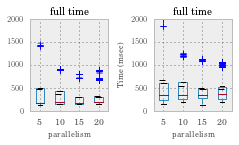

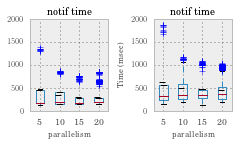

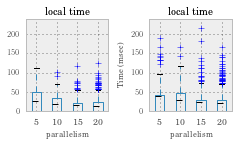

In [33]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillCC, Filters.point(DF.num_Windows.name, 1))
myDF2 = filterDF(timelyCC, Filters.point(DF.num_Windows.name, 1))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.parallelism.name);
for ax in axs:
    ax.set_ylim(0,2000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccFullByParallelism.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.parallelism.name);
for ax in axs:
    ax.set_ylim(0,2000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccNotifByParallelism.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.parallelism.name);
for ax in axs:
    ax.set_ylim(0,240)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccLocalByParallelism.pdf', bbox_inches='tight')


### By Iteration/Loop

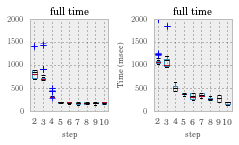

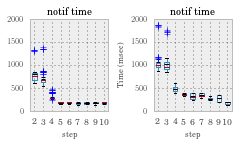

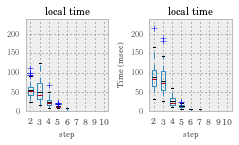

In [34]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillCC, Filters.point(DF.num_Windows.name, 1))
myDF2 = filterDF(timelyCC, Filters.point(DF.num_Windows.name, 1))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.step.name);
for ax in axs:
    ax.set_ylim(0,2000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccFullByStep.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.step.name);
for ax in axs:
    ax.set_ylim(0,2000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccNotifByStep.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.step.name);
for ax in axs:
    ax.set_ylim(0,240)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccLocalByStep.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.savefig('expnotif2.pdf', bbox_inches='tight')


## PageRank
Stream Pagerank is more computationally intensive and maintains the same workload across different iterations for the same window

### By Parallelism

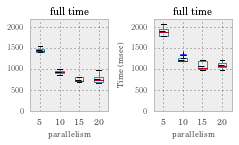

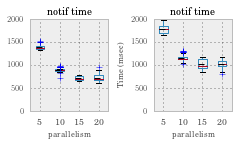

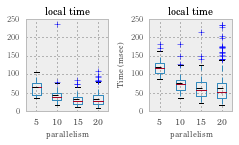

In [35]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillPR, Filters.point(DF.num_Windows.name, 1))
myDF2 = filterDF(timelyPR, Filters.point(DF.num_Windows.name, 1))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.parallelism.name);
for ax in axs:
    ax.set_ylim(0,2200)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prFullByParallelism.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.parallelism.name);
for ax in axs:
    ax.set_ylim(0,2000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prNotifByParallelism.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.parallelism.name);
for ax in axs:
    ax.set_ylim(0,250)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prLocalByParallelism.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.savefig('expnotif2.pdf', bbox_inches='tight')


### By Loop

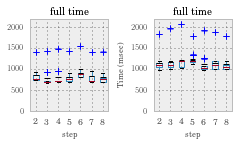

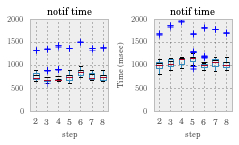

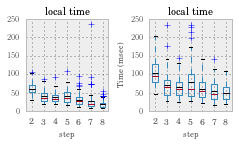

In [36]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillPR, Filters.point(DF.num_Windows.name, 1))
myDF2 = filterDF(timelyPR, Filters.point(DF.num_Windows.name, 1))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.step.name);
for ax in axs:
    ax.set_ylim(0,2200)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prFullByLoop.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.step.name);
for ax in axs:
    ax.set_ylim(0,2000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prNotifByLoop.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.step.name);
for ax in axs:
    ax.set_ylim(0,250)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prLocalByLoop.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.savefig('expnotif2.pdf', bbox_inches='tight')


## B) Adapting to Multiplexing (degree of OOP)
In this series of experiments we study *multiple* window iterations performance in terms of execution latency per loop across increasing number of parallel windows sharing the same dataflow infrastructure (i.e., operator sharing) and fixed parallelism of 20 instances

## Connected Components

### By Num of Windows

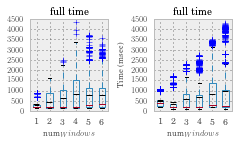

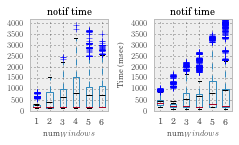

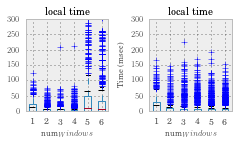

In [37]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillCC, Filters.point(DF.parallelism.name, 20))
myDF2 = filterDF(timelyCC, Filters.point(DF.parallelism.name, 20))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.num_Windows.name);
for ax in axs:
    ax.set_ylim(0,4500)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccFullP20ByWindow.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.num_Windows.name);
for ax in axs:
    ax.set_ylim(0,4200)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccNotifP20ByWindow.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.num_Windows.name);
for ax in axs:
    ax.set_ylim(0,300)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccLocalP20ByWindow.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.savefig('expnotif2.pdf', bbox_inches='tight')


### By Loop

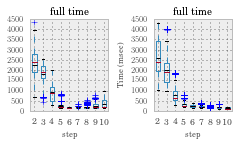

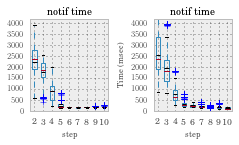

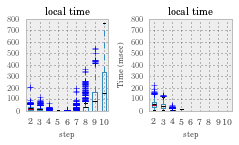

In [38]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillCC, Filters.point(DF.parallelism.name, 20))
myDF2 = filterDF(timelyCC, Filters.point(DF.parallelism.name, 20))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.step.name);
for ax in axs:
    ax.set_ylim(0,4500)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccFullP20ByLoop.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.step.name);
for ax in axs:
    ax.set_ylim(0,4200)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccNotifP20ByLoop.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.step.name);
for ax in axs:
    ax.set_ylim(0,800)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('ccLocalP20ByLoop.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.savefig('expnotif2.pdf', bbox_inches='tight')


## PageRank


### By Num of Windows

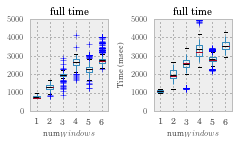

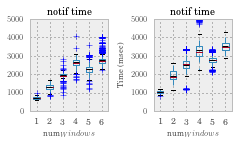

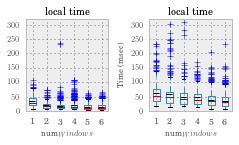

In [39]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillPR, Filters.point(DF.parallelism.name, 20))
myDF2 = filterDF(timelyPR, Filters.point(DF.parallelism.name, 20))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.num_Windows.name);
for ax in axs:
    ax.set_ylim(0,5000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prFullP20ByWindow.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.num_Windows.name);
for ax in axs:
    ax.set_ylim(0,5000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prNotifP20ByWindow.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.num_Windows.name);
for ax in axs:
    ax.set_ylim(0,320)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prLocalP20ByWindow.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.savefig('expnotif2.pdf', bbox_inches='tight')


### By Loop

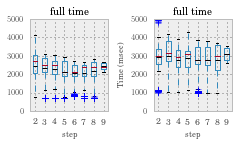

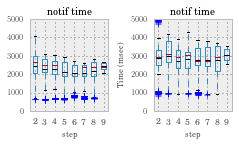

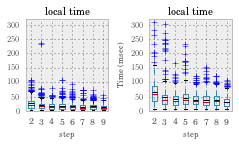

In [40]:
#numOfWindows==1, group by parallelism
myDF = filterDF(timekillPR, Filters.point(DF.parallelism.name, 20))
myDF2 = filterDF(timelyPR, Filters.point(DF.parallelism.name, 20))

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.full, DF.step.name);
for ax in axs:
    ax.set_ylim(0,5000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prFullP20ByLoop.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.notification, DF.step.name);
for ax in axs:
    ax.set_ylim(0,5000)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prNotifP20ByLoop.pdf', bbox_inches='tight')

axs = ExpPlots.twoBoxPlots(myDF, myDF2, Aggregate.computation, DF.step.name);
for ax in axs:
    ax.set_ylim(0,320)
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('prLocalP20ByLoop.pdf', bbox_inches='tight')
#plt.tight_layout()
#plt.savefig('expnotif2.pdf', bbox_inches='tight')


In [1]:
DF[DF[DF.step.name] == 9]

NameError: name 'DF' is not defined

In [73]:
DFIntervals = ExpLoader.loadDataFrame(rootDir="experiments2")

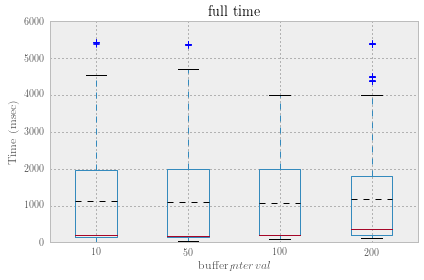

In [79]:
axs = ExpPlots.box1(
     filterDF2(DFIntervals, Alg.connectedComponents, ProgressType.centralized, 
                        Filters.highCap(Aggregate.full, 15000),
                        Filters.highCap(Aggregate.notification, 8000))
    , Aggregate.full, DF.buffer_Interval.name);
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('aggregationIntervalsCC.pdf', bbox_inches='tight')

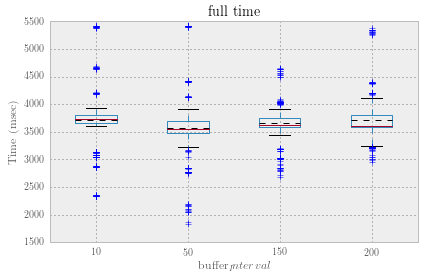

In [80]:
axs = ExpPlots.box1(
     filterDF2(DFIntervals, Alg.pagerank, ProgressType.centralized, 
                        Filters.highCap(Aggregate.full, 15000),
                        Filters.highCap(Aggregate.notification, 8000))
    , Aggregate.full, DF.buffer_Interval.name);
plt.ylabel('Time (msec)')
plt.tight_layout()
plt.suptitle('')
plt.savefig('aggregationIntervalsPR.pdf', bbox_inches='tight')